<a href="https://colab.research.google.com/github/subhayughoshal/Prediction-Models_using_ML/blob/main/Car_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import uuid


In [22]:
car=pd.read_csv('quikr_car.csv')

In [23]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [24]:
# Set random seed for reproducibility
np.random.seed(42)

In [25]:
car.shape

(892, 6)

In [26]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [27]:
backup=car.copy()

##Data Cleaning

###year has many non year values


In [28]:
car=car[car['year'].str.isnumeric()]

In [29]:
car['year']=car['year'].astype(int)

In [30]:
car=car[car['Price']!='Ask For Price']

In [31]:
#price has commas in its numbers and is of object dtype
car['Price']=car['Price'].str.replace(',','').astype(int)

In [32]:
#kms_driven has object values with kms at last.
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [33]:
#kms_driven has last two rows with petrol in them
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

In [34]:
#fuel_type has missing values
car=car[~car['fuel_type'].isna()]

In [35]:
# Remove rows with invalid company names (e.g., "I", "selling")
valid_companies = ['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Toyota', 'Honda', 'Skoda', 'Audi',
                   'Renault', 'Volkswagen', 'Mitsubishi', 'Datsun', 'Chevrolet', 'BMW', 'Tata',
                   'Nissan', 'Fiat', 'Mini', 'Jaguar', 'Mercedes', 'Land', 'Force', 'Volvo',
                   'Hindustan', 'Commercial', 'Jeep']
car = car[car['company'].isin(valid_companies)]

In [36]:
car.shape

(816, 6)

In [37]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


# **Exploratory Data Analysis (EDA)**

###1. Boxplot of Price by Company

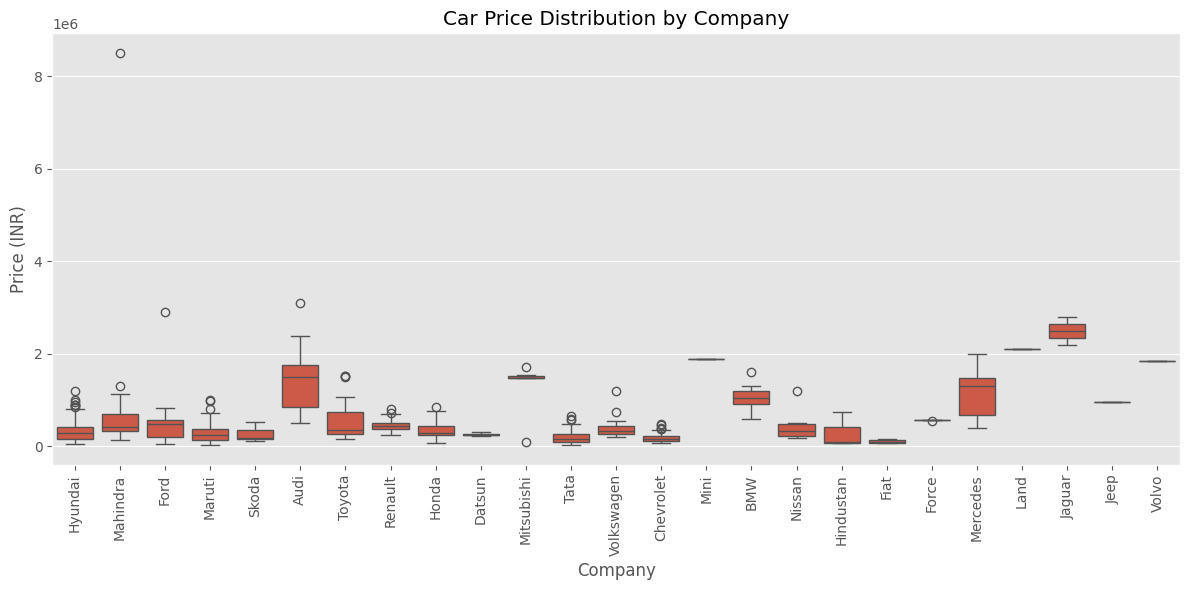

In [43]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='company', y='Price', data=car)
plt.xticks(rotation=90)
plt.title('Car Price Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

###2. Scatter plot of Price vs. Age

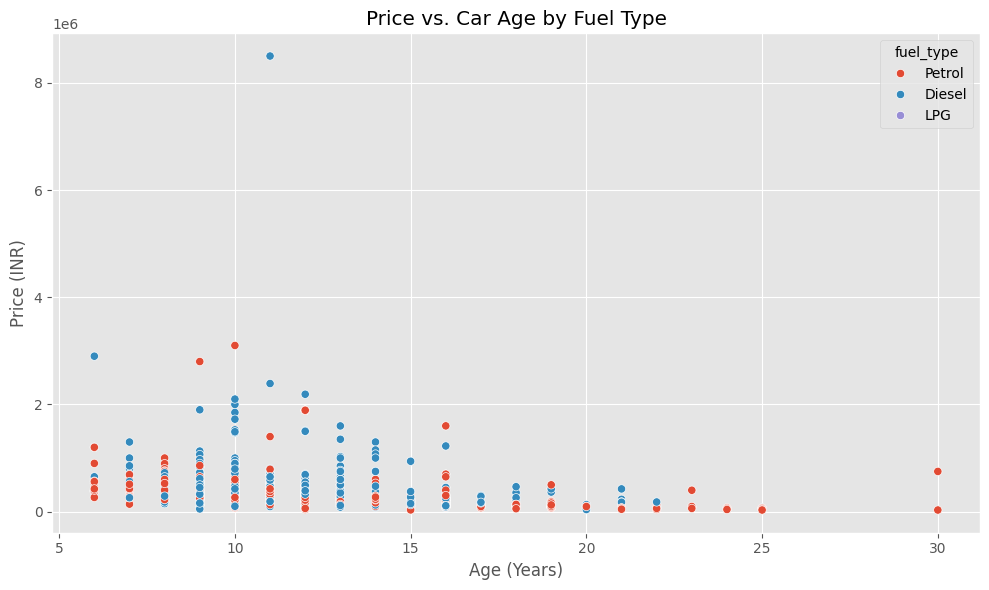

In [47]:
#calculate age first
car['age'] = 2025 - car['year']
car = car.drop('year', axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Price', hue='fuel_type', data=car)
plt.title('Price vs. Car Age by Fuel Type')
plt.xlabel('Age (Years)')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

###3. Scatter plot of Price vs. Kilometers Driven

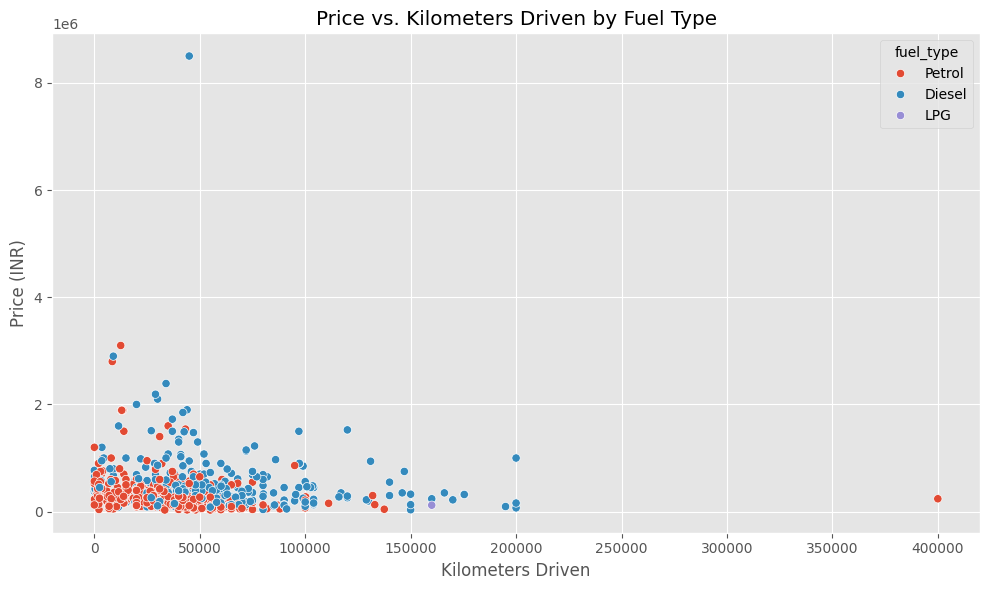

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='Price', hue='fuel_type', data=car)
plt.title('Price vs. Kilometers Driven by Fuel Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

In [51]:
# Prepare data for modeling
car_encoded = pd.get_dummies(car, columns=['company', 'fuel_type'], drop_first=True)


Define features and target

In [53]:
X = car_encoded.drop(['Price', 'name'], axis=1)
y = car_encoded['Price']

Split data into training and testing sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Train Random Forest Regressor

In [56]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
y_pred = model.predict(X_test)

###Evaluating the Model

In [58]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 457077769298.13
Root Mean Squared Error (RMSE): 676075.27
Mean Absolute Error (MAE): 180232.39
R-squared (R2): 0.18


###Residual Plot

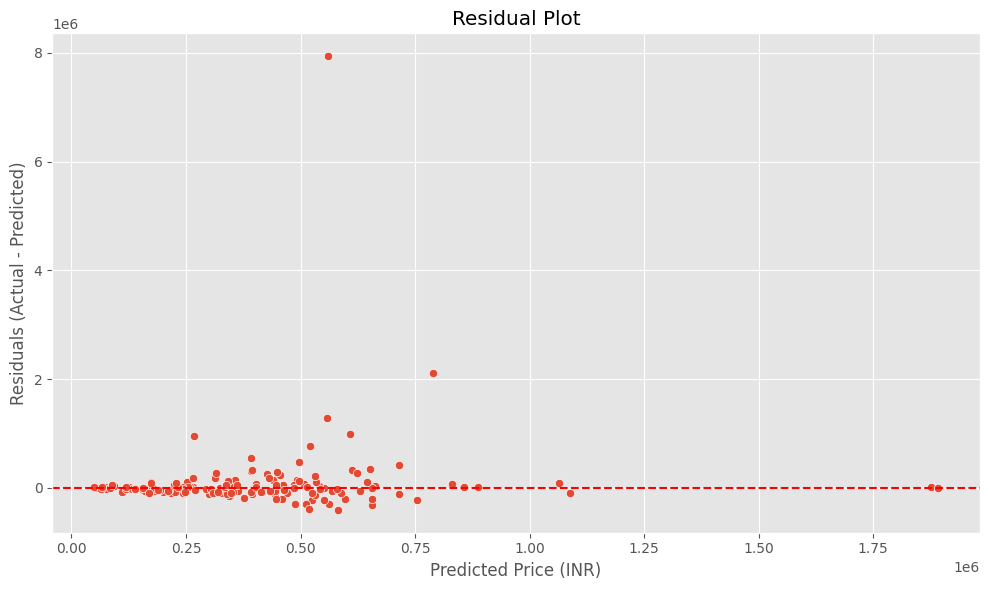

In [60]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price (INR)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.tight_layout()
plt.show()

###Predicted Price vs Actual Price scatter plot

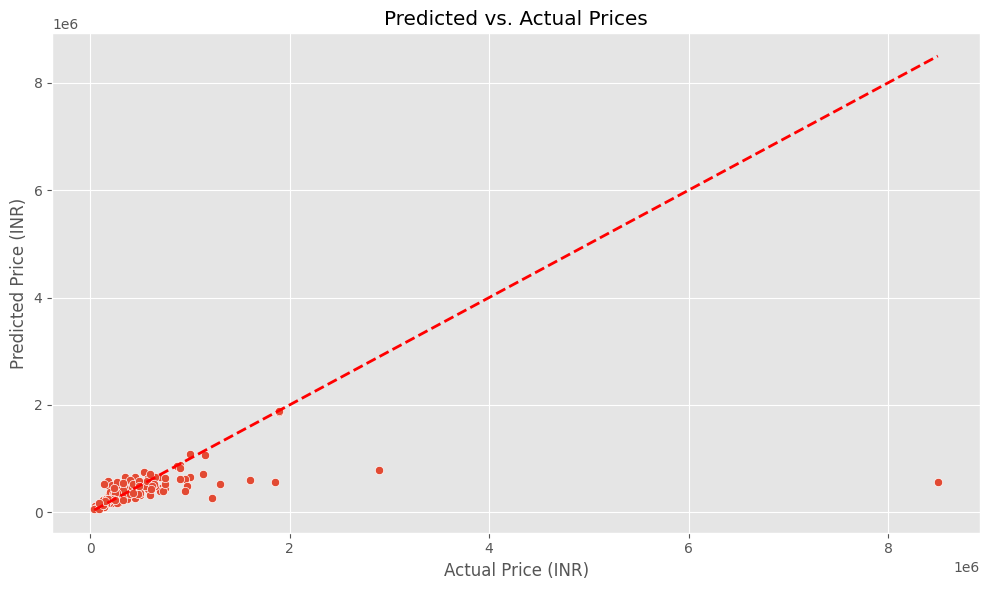

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Price (INR)')
plt.ylabel('Predicted Price (INR)')
plt.tight_layout()
plt.show()

In [62]:
# Function to predict car price
def predict_car_price(company, age, kms_driven, fuel_type, model, feature_columns):
    # Create input data with zeros
    input_data = pd.DataFrame(np.zeros((1, len(feature_columns))), columns=feature_columns)

    # Set numerical features
    input_data['age'] = age
    input_data['kms_driven'] = kms_driven

    # Set categorical features
    if f'company_{company}' in feature_columns:
        input_data[f'company_{company}'] = 1
    if f'fuel_type_{fuel_type}' in feature_columns:
        input_data[f'fuel_type_{fuel_type}'] = 1

    # Predict price
    predicted_price = model.predict(input_data)[0]
    return predicted_price

#### Example: Predict price for Tata Zest, 2017, 50,000 kms, Diesel

In [64]:
example_price = predict_car_price(
    company='Tata',
    age=2025-2017,
    kms_driven=50000,
    fuel_type='Diesel',
    model=model,
    feature_columns=X.columns
)
print(f"\nPredicted price for Tata Zest (2017, 50,000 kms, Diesel): {example_price:.2f} INR")


Predicted price for Tata Zest (2017, 50,000 kms, Diesel): 289840.00 INR
